In [ ]:
### Michelle Kouba
### DSC 650 Week 6
### June 29, 2023
### Computer Vision - 4 Image classification projects (CONVNET)

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/GitHub/dsc650/dsc650/assignments/Assignments06')
!pwd

In [ ]:
# Importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras
from keras import layers, models
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import resnet50

## First CONVNET Model Classifying Images Of Numbers With MNIST Data

In [ ]:
# Importing the data from the MNIST digit dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Creating a ConvNet model that classifies images
# Data Prep
# Inspecting and printing the data for size of each file
print(f'Train_image size: {train_images.shape}')
print(f'Test_image size: {test_images.shape}')
print(f'Train_label size: {train_labels.shape}')
print(f'Test_label size: {test_labels.shape}')

Train_image size: (60000, 28, 28)
Test_image size: (10000, 28, 28)
Train_label size: (60000,)
Test_label size: (10000,)


In [ ]:
# 60000 images in training set and 10000 images in test set.
# Looking at the size of one individual image to confirm shape (should be 28 by 28 from above)
train_images[0].shape

(28, 28)

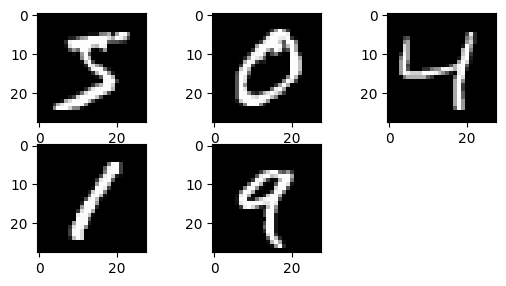

In [ ]:
# Displaying first five training images
for i in range(5):
 plt.subplot(330 + 1 + i)
 plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# Displaying the first five training labels to confirm a match to the images.
for i in range(5):
    print(train_labels[i])

5
0
4
1
9


In [ ]:
# We can see the labels match the images (first picture of a 5 is labeled a 5).
# Reshaping the data so I have access to every pixel of the image.  The
# pixels are 28 by 28 in size.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
# Each RGB color is from 0 to 255 so I'm dividing by 255 to get all the
# ranges of color from 0 to 1 to make it easier.
# Normalizing the datasets
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Converting labels from numeric to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Further splitting the training set into training and validation sets
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
# Creating the ConvNet Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
# Adding the classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
# Adding the optimizer
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training the model on the training data and then validating on the validation set
# Store the training history in a variable called `history`
history = model.fit(
    partial_x_train,  # Images
    partial_y_train,  # Labels
    epochs=5,         # Iterations
    batch_size=64,    # Samples per batch for each update of the model weights
    validation_data=(x_val, y_val)  # Validation set
)

Epoch 1/5
782/782 [==============================] - 70s 84ms/step - loss: 0.2084 - accuracy: 0.9359 - val_loss: 0.0819 - val_accuracy: 0.9751
Epoch 2/5
782/782 [==============================] - 83s 106ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0559 - val_accuracy: 0.9838
Epoch 3/5
782/782 [==============================] - 75s 96ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0380 - val_accuracy: 0.9894
Epoch 4/5
782/782 [==============================] - 61s 78ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0396 - val_accuracy: 0.9892
Epoch 5/5
782/782 [==============================] - 62s 79ms/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.0335 - val_accuracy: 0.9914


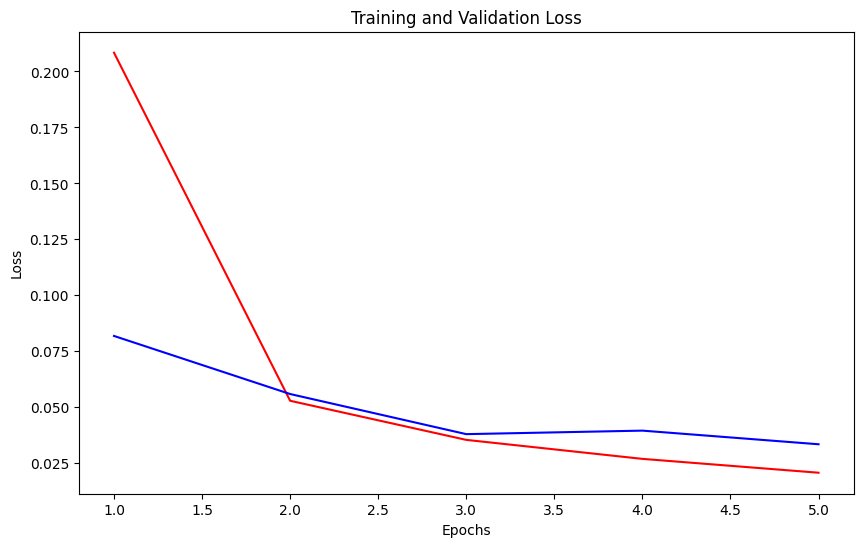

In [ ]:
# Saving the model data from the training and validation run
history_dict = history.history

# Plotting model metrics for loss
plt.figure(figsize=(10, 6))
# Geting the loss values for both training set and validation data
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
# Defining the epochs for the plot (x axis)
epochs = range(1, len(loss_values) + 1)
# Plotting the training and validation loss values by epoch
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.show()


<Figure size 640x480 with 0 Axes>

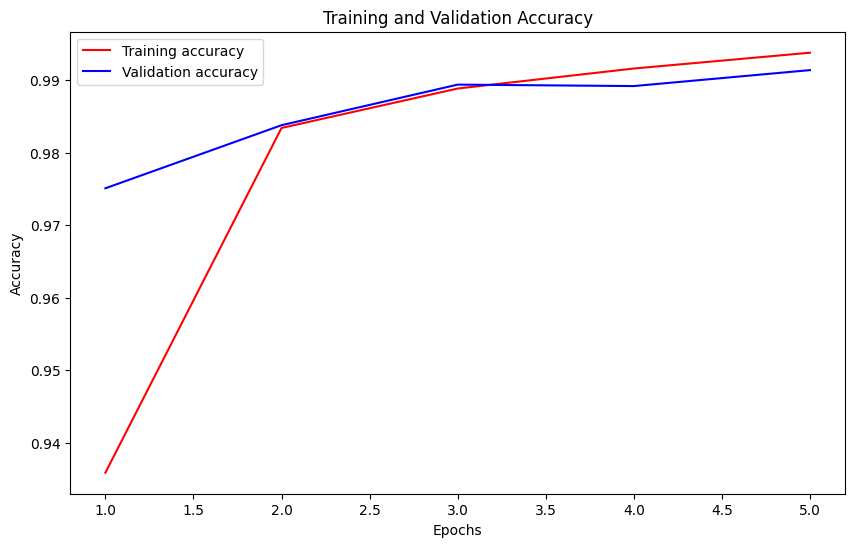

In [ ]:
# Clearing the plot to now load accuracy values
plt.clf()
# Plotting model metrics for loss
plt.figure(figsize=(10, 6))

# Get the accuracy values for both training and validation data
accuracy_values = history_dict['accuracy']
validation_accuracy_values = history_dict['val_accuracy']
# Defining the epochs for the plot (x axis)
epochs = range(1, len(loss_values) + 1)
# Plotting the training and validation accuracy values by epoch
plt.plot(epochs, accuracy_values, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Pulling the test loss and accuracy values from the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 9s 28ms/step - loss: 0.0277 - accuracy: 0.9918


In [ ]:
# Testing accuracy is 99.18% and loss is 0.0277.

## Second CONVNET Model Classifying Images Of Objects (CIFAR10)

In [ ]:
# Importing the data from the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# Creating a ConvNet model that classifies images
# Data Prep
# Inspecting and printing the data for size of each file
print(f'Train_image size: {train_images.shape}')
print(f'Test_image size: {test_images.shape}')
print(f'Train_label size: {train_labels.shape}')
print(f'Test_label size: {test_labels.shape}')

Train_image size: (50000, 32, 32, 3)
Test_image size: (10000, 32, 32, 3)
Train_label size: (50000, 1)
Test_label size: (10000, 1)


In [ ]:
# 50000 images in training set and 10000 images in test set.
# Looking at the size of one individual image to confirm shape (should be 32 by 32 by 3 (color) from above)
train_images[0].shape

(32, 32, 3)

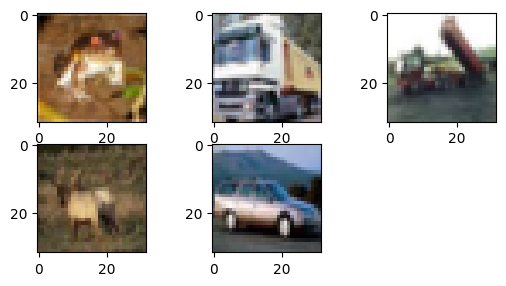

In [ ]:
# Displaying first five training images
for i in range(5):
 plt.subplot(330 + 1 + i)
 plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# Visualization list (1=airplane, etc....)
cifar10_categories = ['airplane', 'automobile', 'bird', 'cat',
                   'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Displaying the first five training labels to confirm a match to the images.
for i in range(5):
    print(train_labels[i])

[6]
[9]
[9]
[4]
[1]


In [ ]:
# We can see the labels match the images (first picture of a 6 is labeled a is a frog(sixth item)).
# Reshaping the data so I have access to every pixel of the image.  The
# pixels are 32 by 32 by 3 in size.
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
# Each RGB color is from 0 to 255 so I'm dividing by 255 to get all the
# ranges of color from 0 to 1 to make it easier.
# Normalizing the datasets
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
#Saving out lists for later analysis
train_labels_list = train_labels
test_labels_list = test_labels
# Converting labels from numeric to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Further splitting the training set into training and validation sets
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
# Creating the ConvNet Model
model = models.Sequential()
# Adding first layer
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same', input_shape = (32, 32, 3)))
# Adding second layer
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
# Adding max pooling layer
model.add(layers.MaxPooling2D((2,2)))
# Adding third layer
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
# Adding fourth layer
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
# Adding another max pooling layer
model.add(layers.MaxPooling2D((2,2)))
# Adding fifth and sixth layer
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
# Adding another max pooling layer
model.add(layers.MaxPooling2D((2,2)))
# Adding the classifier (flatten layer, fully connected layer and output layer)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
# Looking at the dimensions of the feature maps with every successive layer
model.summary()
# Adding the optimizer
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
# Training the model on the training data and then validating on the validation set
# Store the training history in a variable called `history`
history = model.fit(
    partial_x_train,  # Images
    partial_y_train,  # Labels
    epochs=30,         # Iterations per page 137
    batch_size=64,    # Samples per batch for each update of the model weights
    validation_data=(x_val, y_val) ) # Validation set

# Saving the model data from the training and validation run
history_dict = history.history

Epoch 1/30
625/625 [==============================] - 336s 536ms/step - loss: 1.8015 - accuracy: 0.3478 - val_loss: 1.5712 - val_accuracy: 0.4274
Epoch 2/30
625/625 [==============================] - 334s 535ms/step - loss: 1.4168 - accuracy: 0.4911 - val_loss: 1.2928 - val_accuracy: 0.5362
Epoch 3/30
625/625 [==============================] - 331s 530ms/step - loss: 1.2506 - accuracy: 0.5559 - val_loss: 1.2009 - val_accuracy: 0.5777
Epoch 4/30
625/625 [==============================] - 329s 527ms/step - loss: 1.1296 - accuracy: 0.6022 - val_loss: 1.1461 - val_accuracy: 0.5937
Epoch 5/30
625/625 [==============================] - 332s 531ms/step - loss: 1.0248 - accuracy: 0.6402 - val_loss: 1.0557 - val_accuracy: 0.6278
Epoch 6/30
625/625 [==============================] - 328s 525ms/step - loss: 0.9440 - accuracy: 0.6700 - val_loss: 0.9774 - val_accuracy: 0.6621
Epoch 7/30
625/625 [==============================] - 335s 537ms/step - loss: 0.8749 - accuracy: 0.6963 - val_loss: 1.0107 -

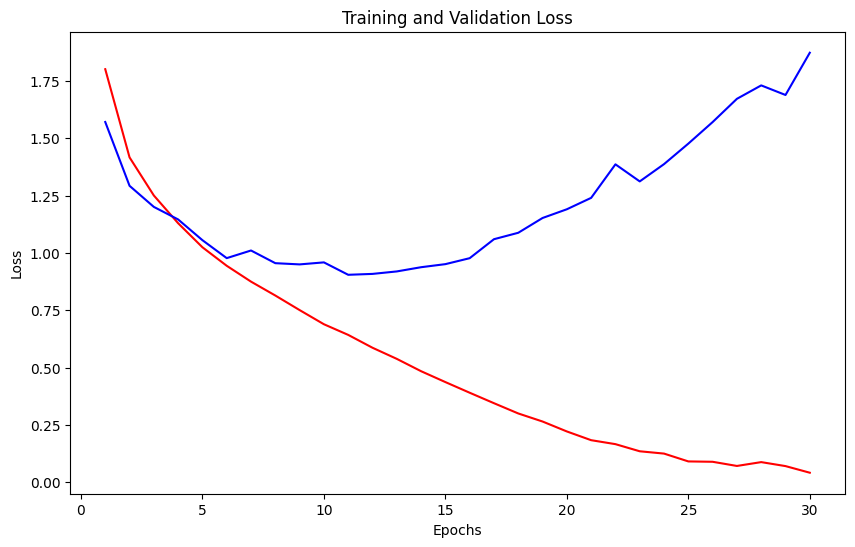

In [ ]:
# Plotting model metrics for loss
plt.figure(figsize=(10, 6))
# Geting the loss values for both training set and validation data
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
# Defining the epochs for the plot (x axis)
epochs = range(1, len(loss_values) + 1)
# Plotting the training and validation loss values by epoch
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.show()

<Figure size 640x480 with 0 Axes>

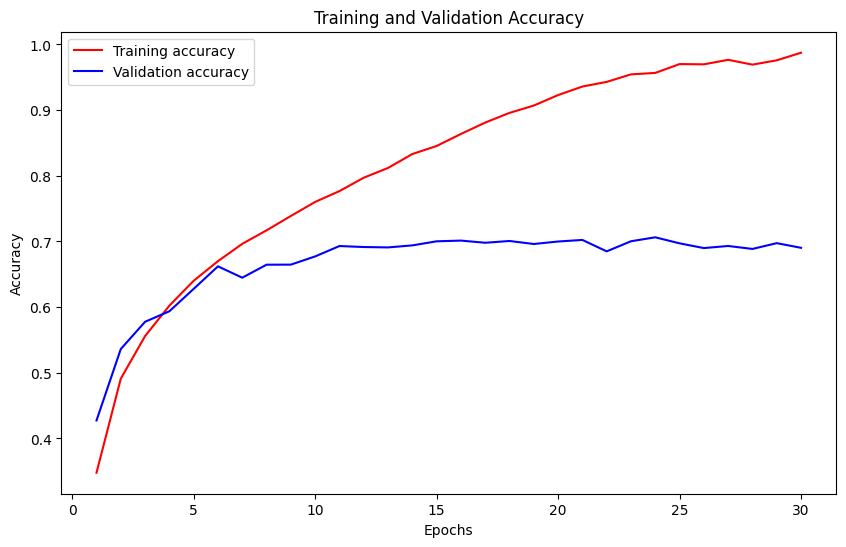

In [ ]:
# Clearing the plot to now load accuracy values
plt.clf()
# Plotting model metrics for loss
plt.figure(figsize=(10, 6))

# Get the accuracy values for both training and validation data
accuracy_values = history_dict['accuracy']
validation_accuracy_values = history_dict['val_accuracy']
# Defining the epochs for the plot (x axis)
epochs = range(1, len(loss_values) + 1)
# Plotting the training and validation accuracy values by epoch
plt.plot(epochs, accuracy_values, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Pulling the test loss and accuracy values from the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 20s 64ms/step - loss: 1.9385 - accuracy: 0.6888


In [ ]:
# Testing accuracy without dropout or data augmentation is 68.88% and loss is 1.9385.

In [ ]:
# Predicting the labels of the test data
label_pred_test = model.predict(test_images)
# Pulling the predicted labels with the highest probability
label_pred_test_classes = np.argmax(label_pred_test, axis=1)
# Pulling the highest probability of the predicted classes
label_pred_test_max_probability = np.max(label_pred_test, axis=1)

313/313 [==============================] - 20s 64ms/step


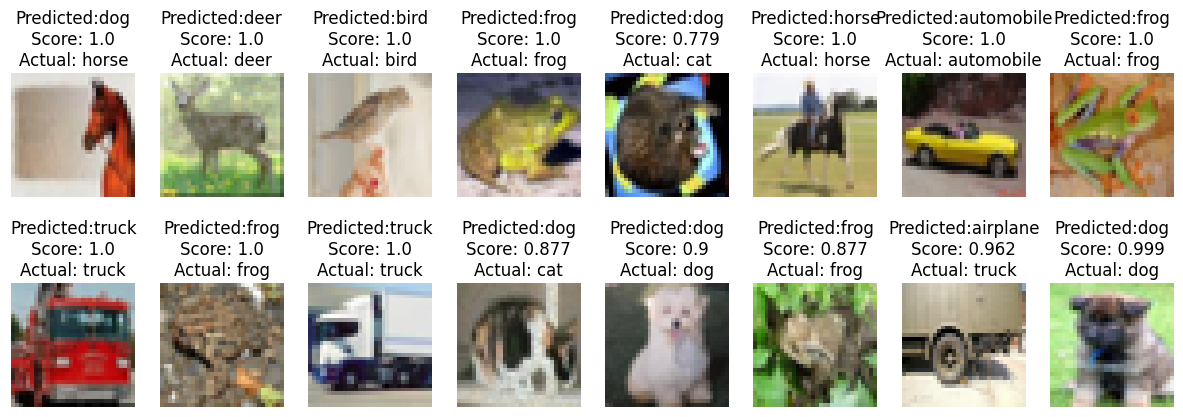

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels_list))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test_images[random_index, :])
        pred_label =  cifar10_categories[label_pred_test_classes[random_index]]
        pred_proba = label_pred_test_max_probability[random_index]
        true_label = cifar10_categories[test_labels_list[random_index, 0]]
        ax.set_title(f'Predicted:{pred_label}\nScore: {pred_proba:.3}\nActual: {true_label}')
plt.show()

## Same CONVNET Model Without Dropout and Data Augmentation (CIFAR10)

In [ ]:
# Rerunning CIFAR10 model with dropout and data augmentation
# Importing the data from the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Creating a ConvNet model that classifies images
# Data Prep
# Inspecting and printing the data for size of each file
print(f'Train_image size: {train_images.shape}')
print(f'Test_image size: {test_images.shape}')
print(f'Train_label size: {train_labels.shape}')
print(f'Test_label size: {test_labels.shape}')
# 50000 images in training set and 10000 images in test set.
# Looking at the size of one individual image to confirm shape (should be 32 by 32 by 3 (color) from above)
train_images[0].shape

170498071/170498071 [==============================] - 2s 0us/step
Train_image size: (50000, 32, 32, 3)
Test_image size: (10000, 32, 32, 3)
Train_label size: (50000, 1)
Test_label size: (10000, 1)


(32, 32, 3)

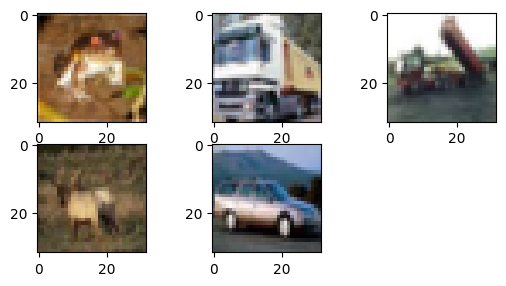

In [ ]:
# Displaying first five training images
for i in range(5):
 plt.subplot(330 + 1 + i)
 plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

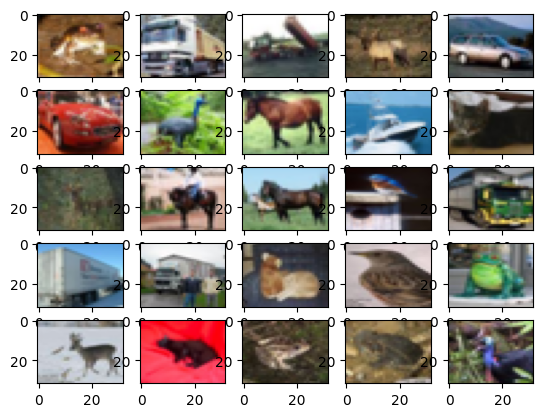

In [ ]:
# Configuring the images and printing more with better resolution.
# Create a new figure and a 5x5 grid of subplots
fig, ax = plt.subplots(5, 5)

# Iterate through the subplots and display the images
image_index = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(train_images[image_index], aspect='auto')
        image_index += 1

# Display the plot
plt.show()

In [ ]:
# Visualization list (1=airplane, etc....)
cifar10_categories = ['airplane', 'automobile', 'bird', 'cat',
                   'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Displaying the first five training labels to confirm a match to the images.
for i in range(5):
    print(train_labels[i])

[6]
[9]
[9]
[4]
[1]


In [ ]:
# We can see the labels match the images (first picture of a 6 is labeled a is a frog(sixth item)).
# Reshaping the data so I have access to every pixel of the image.  The
# pixels are 32 by 32 by 3 in size.
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
# Each RGB color is from 0 to 255 so I'm dividing by 255 to get all the
# ranges of color from 0 to 1 to make it easier.
# Normalizing the datasets
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
#Saving out lists for later analysis
train_labels_list = train_labels
test_labels_list = test_labels
# Converting labels from numeric to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Further splitting the training set into training and validation sets
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
# Creating the ConvNet Model with dropout and data augmentation (adding a batch normalization layer after each colvolutional layer)
model = models.Sequential()
# Adding first layer
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
# Adding second layer
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
# Adding max pooling layer
model.add(layers.MaxPooling2D((2,2)))
# Adding dropout layer
model.add(Dropout(0.2))
# Adding third layer
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
# Adding fourth layer
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
# Adding another max pooling layer
model.add(layers.MaxPooling2D((2,2)))
# Adding dropout layer
model.add(Dropout(0.3))
# Adding fifth and sixth layer
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
# Adding another max pooling layer
model.add(layers.MaxPooling2D((2,2)))
# Adding dropout layer
model.add(Dropout(0.4))
# Adding the classifier (flatten layer, fully connected layer)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(BatchNormalization())
# Adding dropout layer
model.add(Dropout(0.5))
# Adding output layer
model.add(layers.Dense(10, activation = 'softmax'))
# Looking at the dimensions of the feature maps with every successive layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
# Defining stochastic gradient descent optimizer
opt = SGD(learning_rate=0.001, momentum=0.9)

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Creating ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Preparing iterator for training data
it_train = datagen.flow(partial_x_train, partial_y_train, batch_size=64)

# Calculating the number of steps for each epoch
steps = int(partial_x_train.shape[0] / 64)

# Training the model on the training data and then validating on the validation set
# Store the training history in a variable called `history`
history = model.fit(it_train, #Images
                    steps_per_epoch=steps, #Labels
                    epochs=200, #Iterations
                    validation_data=(x_val, y_val), # Validation set
                    verbose=1)

# Saving the model data from the training and validation run
history_dict = history.history

Epoch 1/200
625/625 [==============================] - 37s 42ms/step - loss: 2.2388 - accuracy: 0.2758 - val_loss: 1.5750 - val_accuracy: 0.4233
Epoch 2/200
625/625 [==============================] - 25s 40ms/step - loss: 1.6741 - accuracy: 0.3870 - val_loss: 1.5929 - val_accuracy: 0.4174
Epoch 3/200
625/625 [==============================] - 25s 40ms/step - loss: 1.5306 - accuracy: 0.4395 - val_loss: 1.4297 - val_accuracy: 0.4815
Epoch 4/200
625/625 [==============================] - 25s 41ms/step - loss: 1.4493 - accuracy: 0.4688 - val_loss: 1.4354 - val_accuracy: 0.4860
Epoch 5/200
625/625 [==============================] - 26s 41ms/step - loss: 1.3927 - accuracy: 0.4924 - val_loss: 1.4074 - val_accuracy: 0.5024
Epoch 6/200
625/625 [==============================] - 25s 40ms/step - loss: 1.3405 - accuracy: 0.5178 - val_loss: 1.4447 - val_accuracy: 0.4879
Epoch 7/200
625/625 [==============================] - 26s 41ms/step - loss: 1.2947 - accuracy: 0.5335 - val_loss: 1.2960 - val_ac

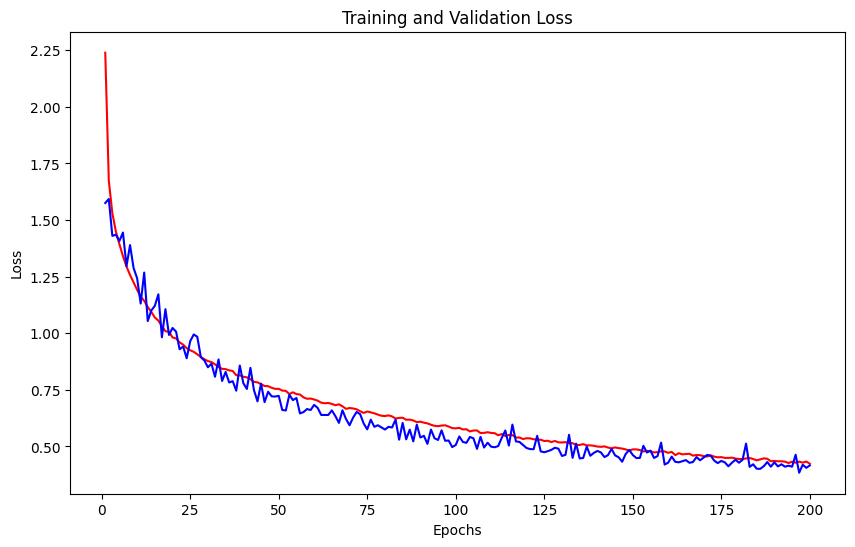

In [ ]:
# Plotting model metrics for loss
plt.figure(figsize=(10, 6))
# Geting the loss values for both training set and validation data
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
# Defining the epochs for the plot (x axis)
epochs = range(1, len(loss_values) + 1)
# Plotting the training and validation loss values by epoch
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.show()

<Figure size 640x480 with 0 Axes>

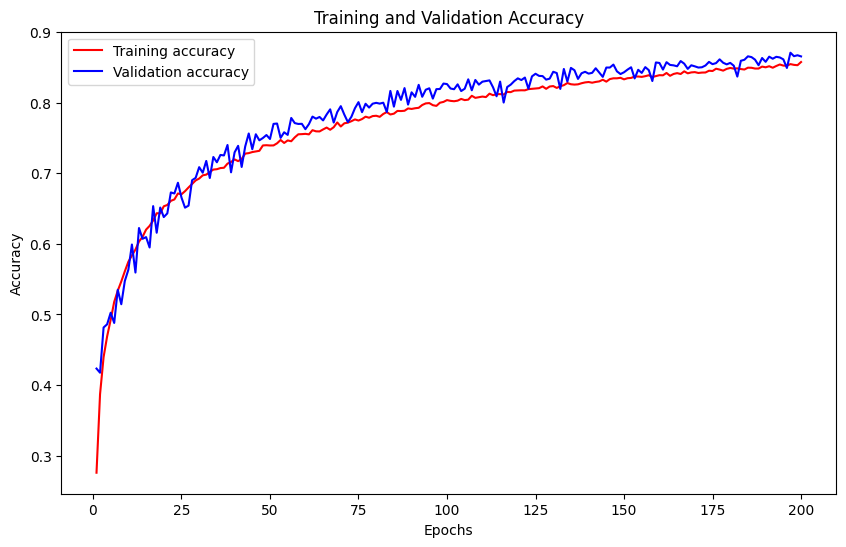

In [ ]:
# Clearing the plot to now load accuracy values
plt.clf()
# Plotting model metrics for loss
plt.figure(figsize=(10, 6))

# Get the accuracy values for both training and validation data
accuracy_values = history_dict['accuracy']
validation_accuracy_values = history_dict['val_accuracy']
# Defining the epochs for the plot (x axis)
epochs = range(1, len(loss_values) + 1)
# Plotting the training and validation accuracy values by epoch
plt.plot(epochs, accuracy_values, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Pulling the test loss and accuracy values from the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4425 - accuracy: 0.8543


In [ ]:
# Testing accuracy WITH dropout or data augmentation is 85.43% and loss is 0.4425.

In [ ]:
# Predicting the labels of the test data
label_pred_test = model.predict(test_images)
# Pulling the predicted labels with the highest probability
label_pred_test_classes = np.argmax(label_pred_test, axis=1)
# Pulling the highest probability of the predicted classes
label_pred_test_max_probability = np.max(label_pred_test, axis=1)

313/313 [==============================] - 1s 2ms/step


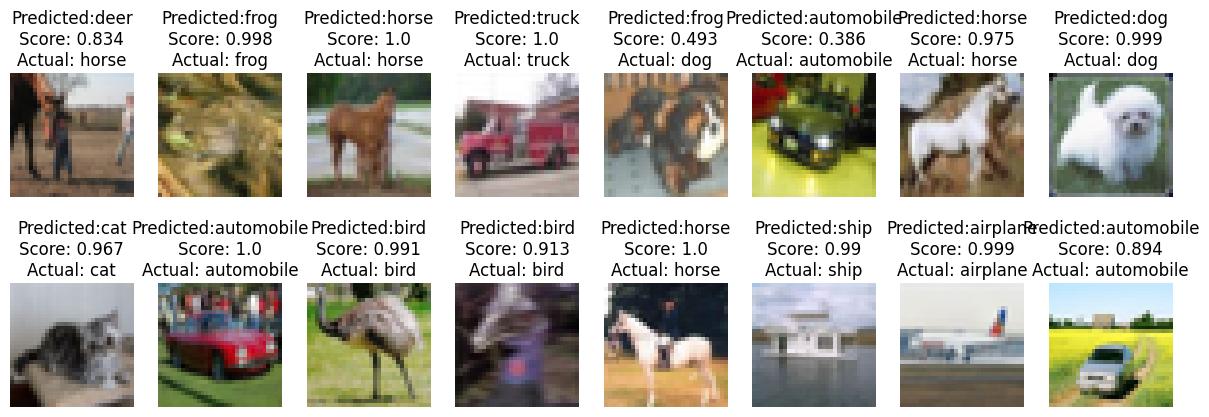

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels_list))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test_images[random_index, :])
        pred_label =  cifar10_categories[label_pred_test_classes[random_index]]
        pred_proba = label_pred_test_max_probability[random_index]
        true_label = cifar10_categories[test_labels_list[random_index, 0]]
        ax.set_title(f'Predicted:{pred_label}\nScore: {pred_proba:.3}\nActual: {true_label}')
plt.show()

In [ ]:
# Performing image classifications on ten images of my choice using the ResNet50 model.

In [ ]:
# Loading in the ResNet50 pre-trained model to classify images.
model = ResNet50(weights='imagenet')

# Creating a function to classify each image with the ResNet50 model.
def picture_classification(image_file):
    #Loading the imaging and setting its size
    img = image.load_img(image_file, target_size=(224, 224))
    #Converting the image to meet the specifications of the ResNet50 model
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # Running the image through the model
    preds = model.predict(x)
    # Printing picture with ResNet prediction/classification
    plt.imshow(img)
    plt.show()
    print('According to the ResNet50 model, image is a:', decode_predictions(preds, top=3)[0])


1/1 [==============================] - 0s 248ms/step


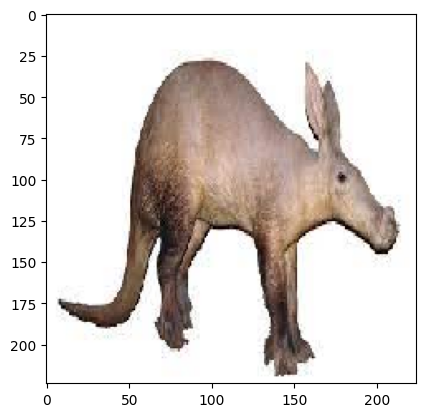

According to the ResNet50 model, image is a: [('n02417914', 'ibex', 0.74797827), ('n02113978', 'Mexican_hairless', 0.11850468), ('n02415577', 'bighorn', 0.06052898)]


In [ ]:
picture_classification('ResNet50images/aardvark.png')

1/1 [==============================] - 0s 382ms/step


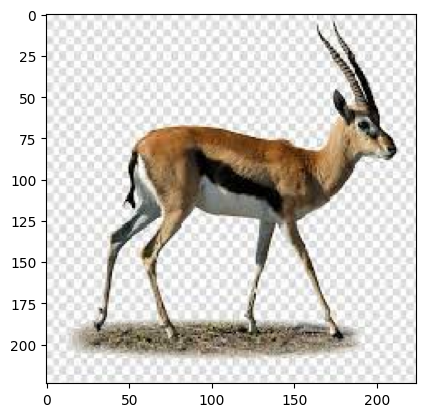

According to the ResNet50 model, image is a: [('n02423022', 'gazelle', 0.94131833), ('n02422699', 'impala', 0.032711826), ('n02422106', 'hartebeest', 0.023483176)]


In [ ]:
picture_classification('ResNet50images/African gazelle.png')

1/1 [==============================] - 0s 348ms/step


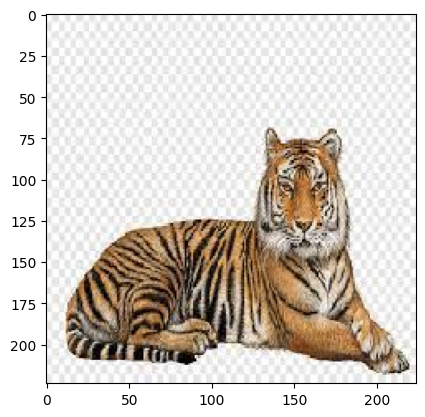

According to the ResNet50 model, image is a: [('n02129604', 'tiger', 0.9783735), ('n02123159', 'tiger_cat', 0.021535048), ('n02123045', 'tabby', 7.283548e-05)]


In [ ]:
picture_classification('ResNet50images/Bengal tiger.png')

1/1 [==============================] - 0s 443ms/step


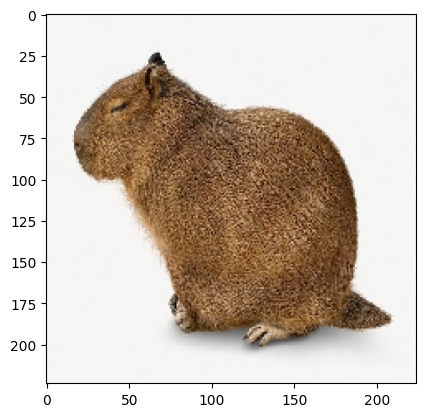

According to the ResNet50 model, image is a: [('n02363005', 'beaver', 0.286437), ('n01883070', 'wombat', 0.20604189), ('n02364673', 'guinea_pig', 0.13366765)]


In [ ]:
picture_classification('ResNet50images/capybara.png')

1/1 [==============================] - 0s 367ms/step


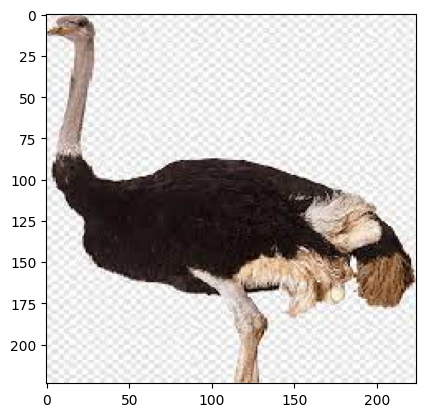

According to the ResNet50 model, image is a: [('n01518878', 'ostrich', 0.9988256), ('n02018795', 'bustard', 0.0011398568), ('n02437616', 'llama', 1.2554241e-05)]


In [ ]:
picture_classification('ResNet50images/ostrich.png')

1/1 [==============================] - 0s 372ms/step


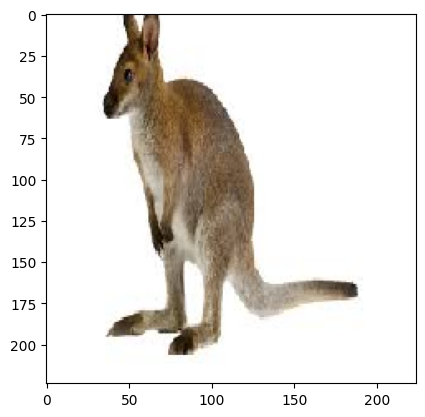

According to the ResNet50 model, image is a: [('n02326432', 'hare', 0.5713027), ('n01877812', 'wallaby', 0.42317283), ('n02417914', 'ibex', 0.0015136629)]


In [ ]:
picture_classification('ResNet50images/wallaby.png')

1/1 [==============================] - 0s 487ms/step


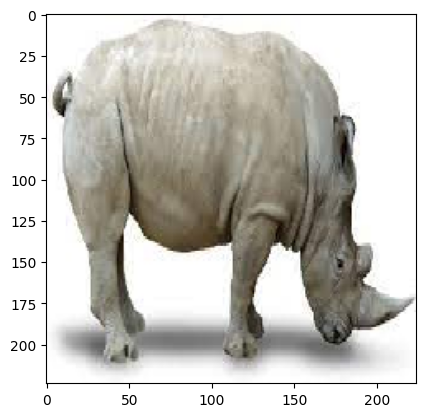

According to the ResNet50 model, image is a: [('n01704323', 'triceratops', 0.2338158), ('n02403003', 'ox', 0.2030292), ('n02504013', 'Indian_elephant', 0.19842783)]


In [ ]:
picture_classification('ResNet50images/white rhino.png')

1/1 [==============================] - 1s 640ms/step


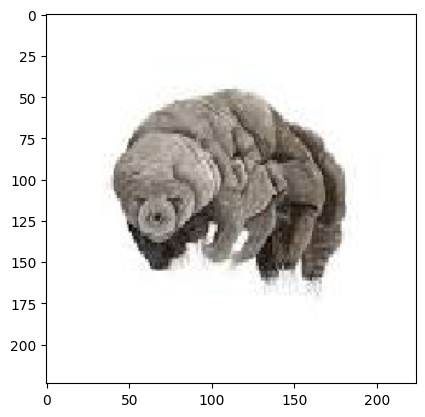

According to the ResNet50 model, image is a: [('n02088466', 'bloodhound', 0.12655208), ('n01704323', 'triceratops', 0.12554552), ('n02102480', 'Sussex_spaniel', 0.07446885)]


In [ ]:
picture_classification('ResNet50images/tardigrade.jpg')

In [ ]:
# Of the eight pictures provided, the classifier was 3/8 on first guesses and 4/8 of the first or second guesses.
# For the more common animals, it seemed to have better results.